In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train_data = pd.read_csv("train.csv")

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Age has 177 missing values
#### Cabin has 687 missing values
#### Embarked has 2 missing values
#### 12 features:
#### PassengerID, Age, Fare are numerical features
#### Sex, Embarked, PClass, Survived are categorical features

#### Question: What about , SibSp, Parch, Ticket and Cabin?


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.describe(include = "object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pettersson, Miss. Ellen Natalia",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


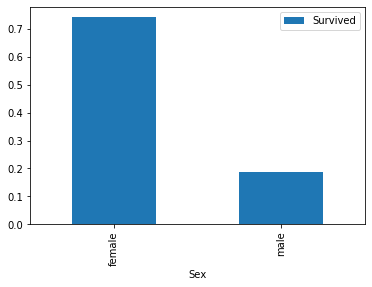

In [8]:
sex_pivot = train_data.pivot_table(index = "Sex", values = "Survived").plot(kind = "bar")

In [9]:
train_data["Survived"][train_data["Sex"] == "male"].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [10]:
train_data["Survived"][train_data["Sex"] == "male"].value_counts(normalize = True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [11]:
train_data["Survived"][train_data["Sex"] == "female"].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [12]:
train_data["Survived"][train_data["Sex"] == "female"].value_counts(normalize = True)



1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [13]:
train_data["Sex"][train_data["Survived"] == 0].value_counts(normalize = True)

male      0.852459
female    0.147541
Name: Sex, dtype: float64

In [14]:
train_data["Sex"][train_data["Survived"] == 1].value_counts(normalize = True)

female    0.681287
male      0.318713
Name: Sex, dtype: float64

In [15]:
#train_data["Child"] = float("NaN")
#train_data["Child"][train_data["Age"] < 18] = 1
#train_data["Child"][train_data["Age"] >= 18] = 0

In [16]:
#print(train_data["Survived"][train_data["Child"] == 1].value_counts(normalize = True))

In [17]:
#print(train_data["Survived"][train_data["Child"] == 0].value_counts(normalize = True))

In [18]:
# train_data["Sex"][train_data["Sex"] == "male"] = 0


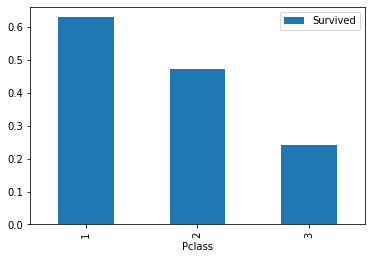

In [19]:
Pclass_pivot = train_data.pivot_table(index = "Pclass", values = "Survived").plot(kind = "bar")

In [20]:
train_data[["Pclass","Survived"]].groupby("Pclass", as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


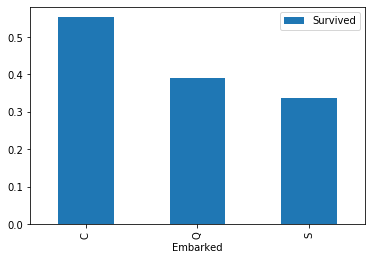

In [21]:
Pclass_pivot = train_data.pivot_table(index = "Embarked", values = "Survived").plot(kind = "bar")

In [22]:
train_data[["Embarked","Survived"]].groupby("Embarked", as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [23]:
train_data["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [24]:
train_data[["SibSp", "Survived"]].groupby("SibSp", as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [25]:
train_data[["Parch", "Survived"]].groupby("Parch", as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


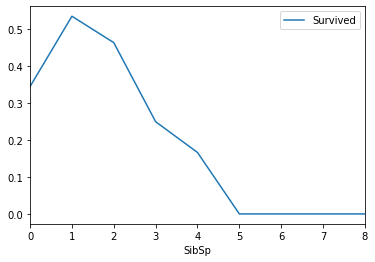

In [26]:
pivot_sibsp = train_data.pivot_table(index = "SibSp", values = "Survived").plot()

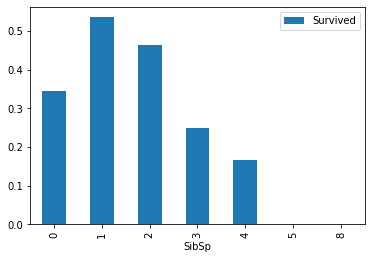

In [27]:
pivot_sibsp = train_data.pivot_table(index = "SibSp", values = "Survived").plot(kind = "bar")

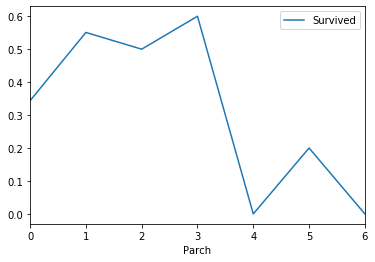

In [28]:
pivot_sibsp = train_data.pivot_table(index = "Parch", values = "Survived").plot()

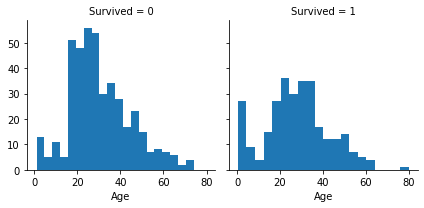

In [29]:
age_hist = sns.FacetGrid(train_data, col = "Survived")
age_hist.map(plt.hist, "Age", bins = 20)

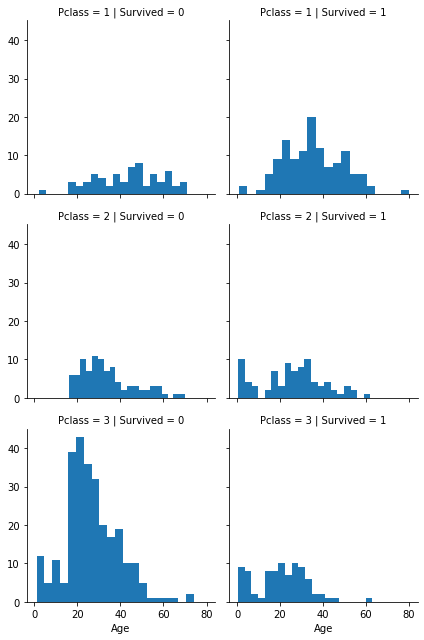

In [30]:
pclass_age_hist = sns.FacetGrid(train_data, col = "Survived", row = "Pclass")
pclass_age_hist.map(plt.hist, "Age", bins = 20)

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


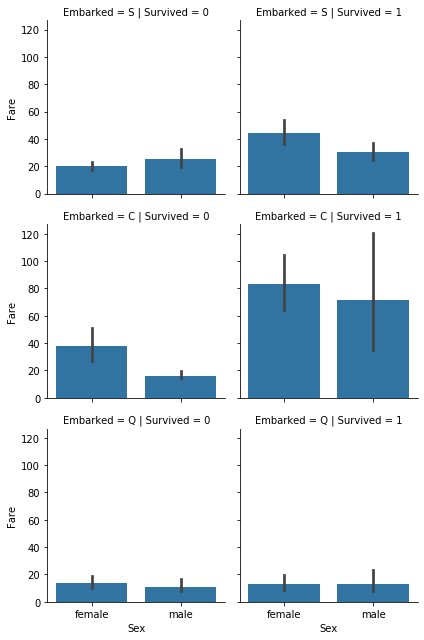

In [31]:
emb_fare = sns.FacetGrid(train_data, col = "Survived", row = "Embarked")
emb_fare.map(sns.barplot, "Sex", "Fare")

In [32]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())

In [33]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
train_data = train_data.drop(['Ticket', 'Cabin', "Name"], axis=1)

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [41]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data["Embarked"].mode()[0])

In [42]:
train_data["Embarked"].isnull().sum()

0

In [48]:
train_data.describe(include = "object")

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [49]:
train_data["Embarked"] = train_data["Embarked"].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [51]:
train_data["Sex"] = train_data["Sex"].map( {"male" : 0, "female" : 1} ).astype(int)

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [53]:
train_data = train_data.drop("PassengerId", axis = 1)

In [54]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [56]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data['Survived']

In [73]:
test_data = pd.read_csv("test.csv")

In [74]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
test_data = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

In [76]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [77]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [78]:
test_data.describe(include = "object")

,Sex,Embarked
count,418,418
unique,2,3
top,male,S
freq,266,270


In [87]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())

In [88]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,2.265550,29.599282,0.447368,0.392344,35.627188
std,0.841838,12.703770,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [93]:
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].mode()[0])

In [94]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.560497
std,0.841838,12.703770,0.896760,0.981429,55.857145
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [95]:
test_data["Embarked"] = test_data["Embarked"].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [96]:
test_data["Sex"] = test_data["Sex"].map( {"male" : 0, "female" : 1} ).astype(int)

In [97]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [99]:
X_test = test_data.copy()

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train,Y_train)*100, 2)
acc_log

C:\Users\tanvi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.91